# Simple Moving Average, Weighted Moving Average , Exponential Weighted Average, Exponential Smoothening

In [128]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller, acf, pacf
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from datetime import datetime



In [129]:

ebill = pd.read_csv('ebillMonthly4.csv',index_col ='BilledMonth') 


In [130]:
ebill.head()

,Amount
BilledMonth,
Jan-00,55.46
Feb-00,61.99
Mar-00,75.38
Apr-00,61.34
May-00,63.07


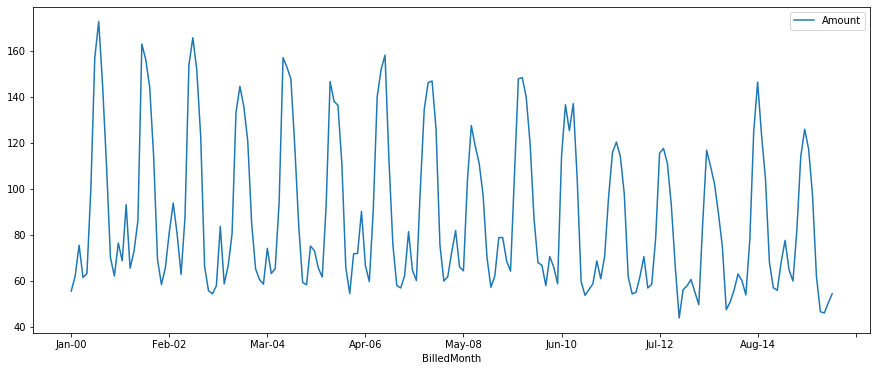

In [131]:
ebill.plot()

In [162]:
# perform Dickey-Fuller test
#Ho: It is non stationary
#H1: It is stationary

from statsmodels.tsa.stattools import adfuller

def adfuller_test(X):
    result=adfuller(X)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

adfuller_test(ebill['Amount'])


ADF Test Statistic : -1.325470948171101
p-value : 0.6174402727680448
#Lags Used : 13
Number of Observations Used : 181
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Make the data Stationary

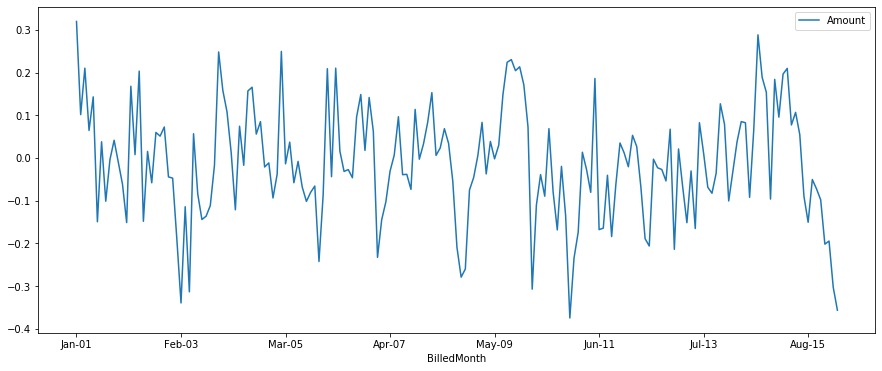

In [160]:
data_log_trans=np.log(ebill)
# Making Seasonal Stationary

data_log_trans_seasonal = data_log_trans.diff(12)[12:].dropna()
data_log_trans_seasonal.plot()

In [163]:
adfuller_test(data_log_trans_seasonal['Amount'])

ADF Test Statistic : -4.080114347856588
p-value : 0.0010444808324413643
#Lags Used : 12
Number of Observations Used : 170
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## Simple Moving Average


### The mean is normally taken from an equal number of data on either side of a central value. This ensures that variations in the mean are aligned with the variations in the data rather than being shifted in time.

Moving Average cant be a great tool when, the data is not stationary and fluctuating.



In [136]:
SMA=data_log_trans_seasonal.rolling(window=3).mean()
SMA

,Amount
BilledMonth,
Jan-01,NaN
Feb-01,NaN
Mar-01,0.210340
Apr-01,0.125242
May-01,0.139110
...,...
Nov-15,-0.073722
Dec-15,-0.124203
Jan-16,-0.164962


In [139]:
data_log_trans_seasonal['ma_rolling_3']= data_log_trans_seasonal.rolling(window=3).mean().shift(1)
data_log_trans_seasonal['ma_rolling_3']

BilledMonth
Jan-01         NaN
Feb-01         NaN
Mar-01         NaN
Apr-01    0.210340
May-01    0.125242
            ...   
Nov-15   -0.091260
Dec-15   -0.073722
Jan-16   -0.124203
Feb-16   -0.164962
Mar-16   -0.233195
Name: ma_rolling_3, Length: 183, dtype: float64

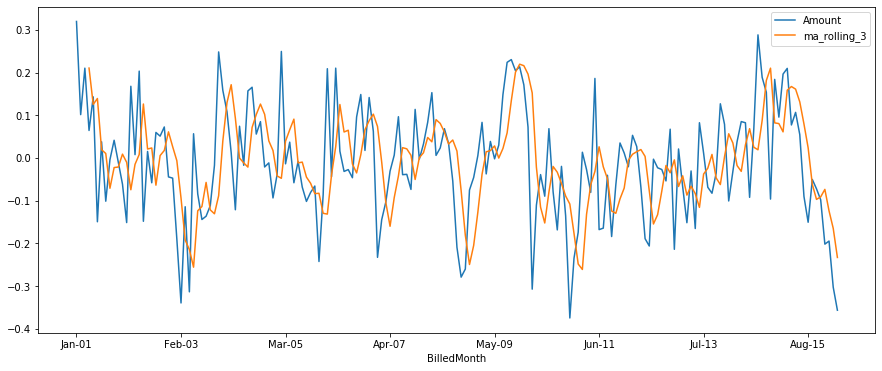

In [140]:
data_log_trans_seasonal.plot()


## Weighted Moving Average
Weighted moving averages can find trens sooner than SMA, on the other hand its complex as we need to assign the weights manually.

In [40]:
def wma(weights):
      def calc(x):
        return (weights*x).mean()
      return calc

In [141]:
#The weights should add up to the window value
data_log_trans_seasonal['wma_rolling_3']= data_log_trans_seasonal['Amount'].rolling(window = 3).apply(wma(np.array([0.5,1,1.5]))).shift(3)

In [142]:
data_log_trans_seasonal

,Amount,ma_rolling_3,wma_rolling_3
BilledMonth,,,
Jan-01,0.319535,NaN,NaN
Feb-01,0.101319,NaN,NaN
Mar-01,0.210165,NaN,NaN
Apr-01,0.064243,0.210340,NaN
May-01,0.142921,0.125242,NaN
...,...,...,...
Nov-15,-0.098136,-0.091260,-0.096350
Dec-15,-0.202019,-0.073722,-0.090572
Jan-16,-0.194732,-0.124203,-0.078211


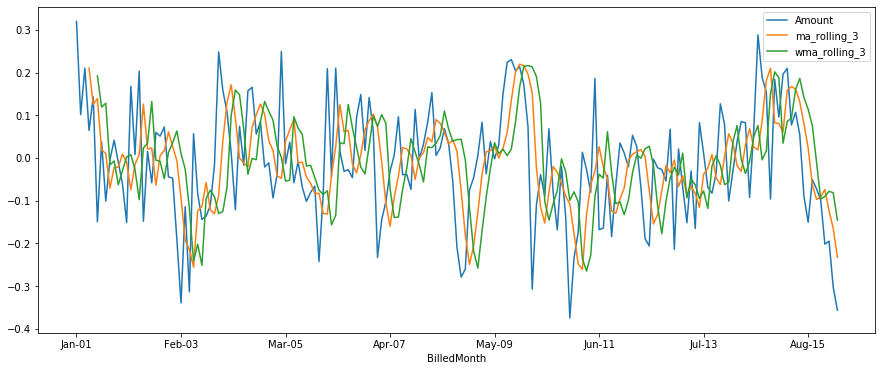

In [143]:
data_log_trans_seasonal.plot()


## Exponential Moving Average
It adopts quickly to the data point changes ,and we dont have to decide the weights manually.

In [144]:
data_log_trans_seasonal['ewm_window_3']= data_log_trans_seasonal['Amount'].ewm(span = 3,adjust = False,min_periods = 0).mean().shift(1)


## Exponential Smoothing
It Requires a parameter called alpha aka Smoothing parameter

Larger value of alpha means the model is paying attention to the newer values,smaller value of alpha mean model is giving importance to history value.

In [145]:
data_log_trans_seasonal['esm_windiw_3_7'] = data_log_trans_seasonal['Amount'].ewm(alpha = 0.7 , adjust = False ,min_periods = 3).mean().shift(1)
data_log_trans_seasonal['esm_windiw_3_7']

BilledMonth
Jan-01         NaN
Feb-01         NaN
Mar-01         NaN
Apr-01    0.197151
May-01    0.104115
            ...   
Nov-15   -0.071968
Dec-15   -0.090286
Jan-16   -0.168499
Feb-16   -0.186862
Mar-16   -0.268043
Name: esm_windiw_3_7, Length: 183, dtype: float64

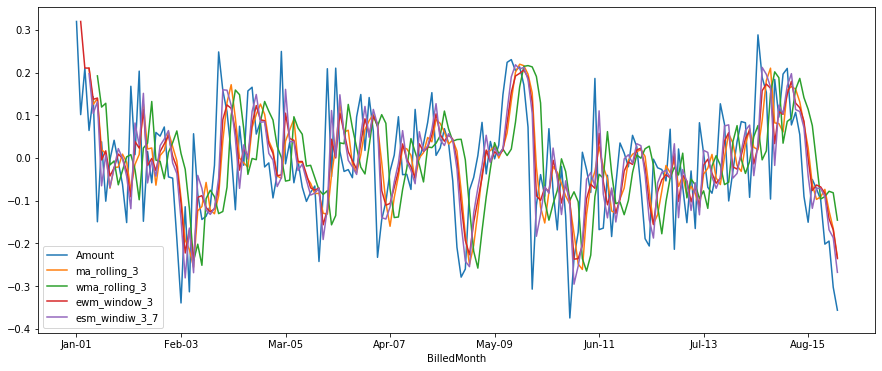

In [146]:
data_log_trans_seasonal.plot()

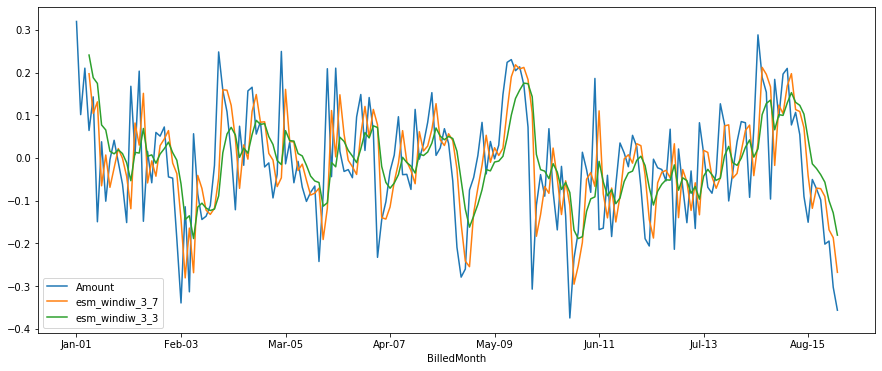

In [147]:
data_log_trans_seasonal['esm_windiw_3_3'] = data_log_trans_seasonal['Amount'].ewm(alpha = 0.3 , adjust = False ,min_periods = 3).mean().shift(1)


data_log_trans_seasonal[['Amount','esm_windiw_3_7','esm_windiw_3_3']].plot()


In [157]:
Original_ebill=np.exp(data_log_trans_seasonal)
Original_ebill.head(15)

,Amount,ma_rolling_3,wma_rolling_3,ewm_window_3,esm_windiw_3_7,esm_windiw_3_3
BilledMonth,,,,,,
Jan-01,1.376488,NaN,NaN,NaN,NaN,NaN
Feb-01,1.106630,NaN,NaN,1.376488,NaN,NaN
Mar-01,1.233882,NaN,NaN,1.234205,NaN,NaN
Apr-01,1.066351,1.234097,NaN,1.234043,1.217928,1.272392
May-01,1.153639,1.133423,NaN,1.147137,1.109728,1.206715
Jun-01,0.861058,1.149250,1.211806,1.150383,1.140286,1.190541
Jul-01,1.038454,1.019376,1.126441,0.995262,0.936757,1.080266
Aug-01,0.903562,1.010408,1.136442,1.016629,1.006837,1.067549
Sep-01,0.995924,0.931378,0.983686,0.958430,0.933380,1.015451


## Evaluation

In [164]:
RMSE_MA=((Original_ebill['Amount']-Original_ebill['ma_rolling_3'])**2).mean()**0.5
RMSE_MA

0.12796436843500947

In [165]:
RMSE_WMA=((Original_ebill['Amount']-Original_ebill['wma_rolling_3'])**2).mean()**0.5
RMSE_WMA

0.15431353499443187

In [166]:
RMSE_EWM=((Original_ebill['Amount']-Original_ebill['ewm_window_3'])**2).mean()**0.5
RMSE_EWM

0.1227716813196526

In [170]:
RMSE_ESM_7=((Original_ebill['Amount']-Original_ebill['esm_windiw_3_7'])**2).mean()**0.5
RMSE_ESM_7

0.12455138746398195

In [171]:
RMSE_ESM_3=((Original_ebill['Amount']-Original_ebill['esm_windiw_3_3'])**2).mean()**0.5
RMSE_ESM_3

0.1235415296889417

### Conclusion : Exponential Moving Average and Exponential Smoothening gives good RMSE value after making it stationary